# Predicting Median House Values

 ## Data set Attributes

 The data set contains information about houses in Boston, Massachusetts. The data set was collected by the U.S. Census Service and first published by Harrison and Rubenfeld in 1978.

 It contains the following variables:
* **crim:** per capita crime rate by town
* **zn:** proportion of residential land zoned for lots over 25,000 sq. ft
* **indus:** proportion of non-retail business acres per town
* **chas:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* **nox:** nitric oxide concentration (parts per 10 million)
* **rm:** average number of rooms per dwelling
* **age:** proportion of owner-occupied units built prior to 1940
* **dis:** weighted distances to five boston employment centers
* **rad:** index of accessibility to radial highways
* **tax:** full-value property tax rate per \$10,000
* **ptratio:** pupil-teacher ratio by town
* **b:** 1000(bk — 0.63)², where bk is the proportion of [people of African American descent] by town
* **lstat:** percentage of lower status of the population
* **medv:** median value of owner-occupied homes in $1000s


*Harrison, David, and Daniel L. Rubinfeld, Hedonic Housing Prices and the Demand for Clean Air, Journal of Environmental Economics and Management, Volume 5, (1978), 81-102. Original data.*


 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the median value based on the 'rm' and 'lstat` variables.


In [1]:
# Import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# Read in the data set
boston = pd.read_csv('boston.csv')
# get total rows and columns
print(boston.shape)
# get a sample of values
boston.head()


(506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [68]:
# Clean and pre-process the data if neccessary
boston.describe() 


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


There's no missing data in the file.

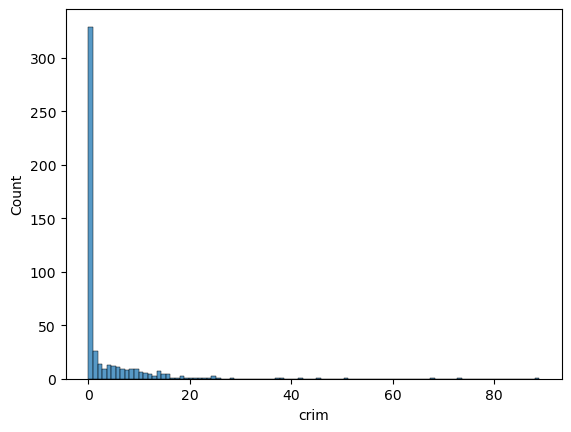

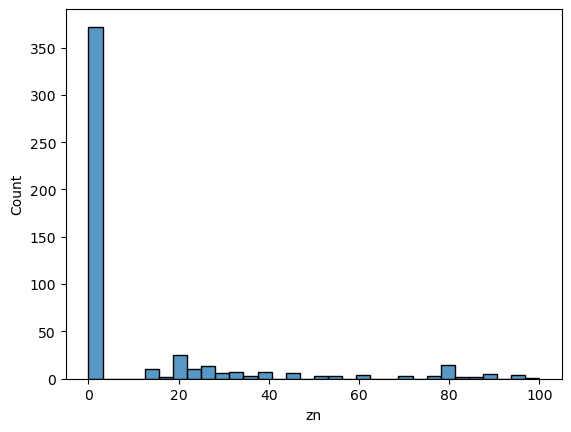

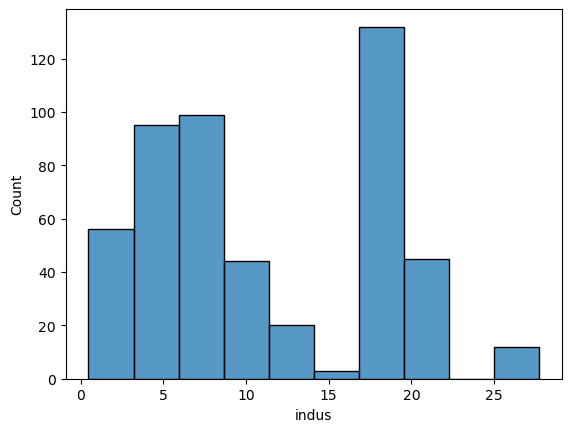

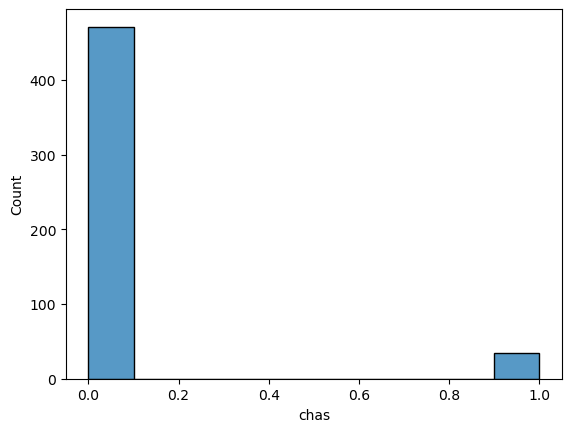

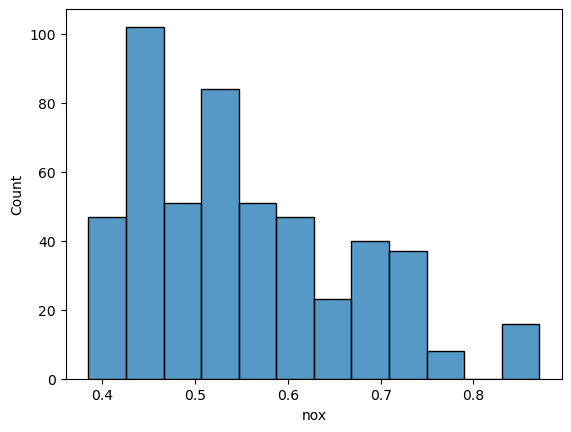

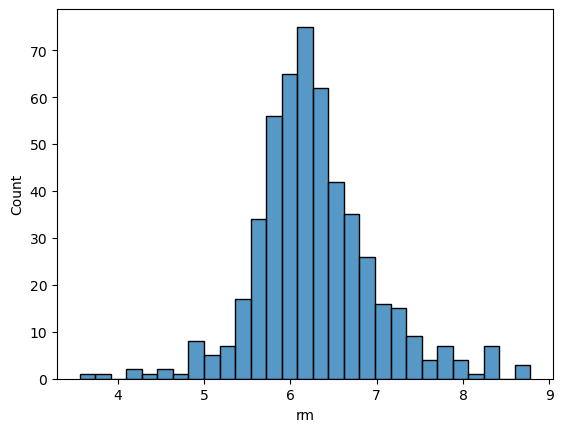

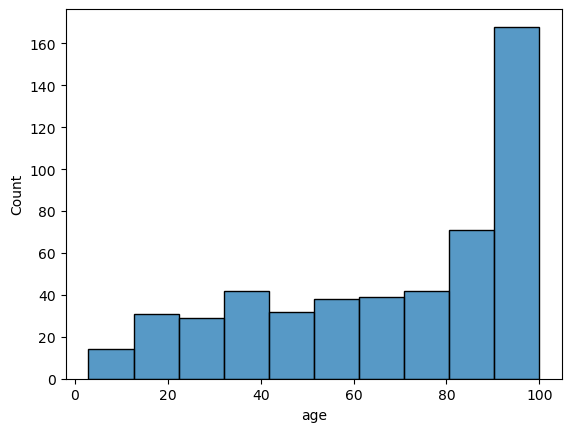

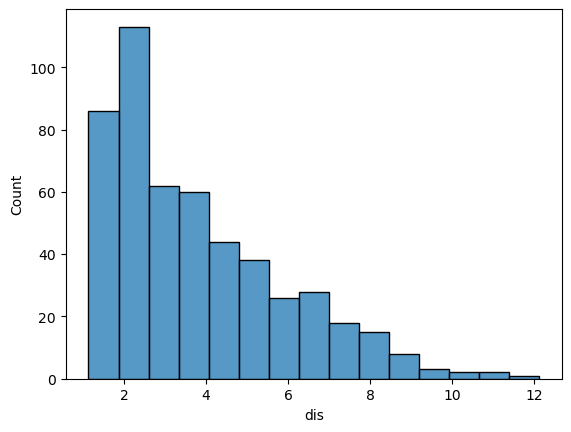

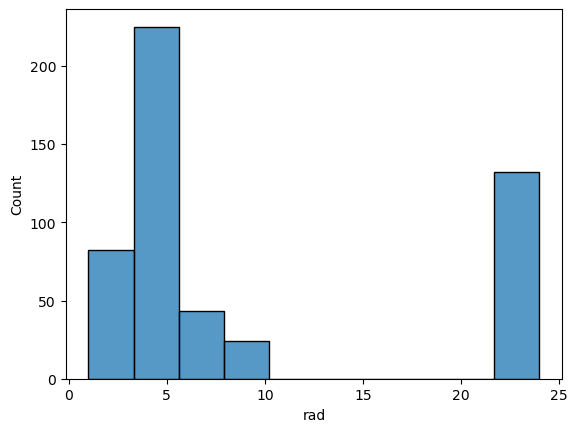

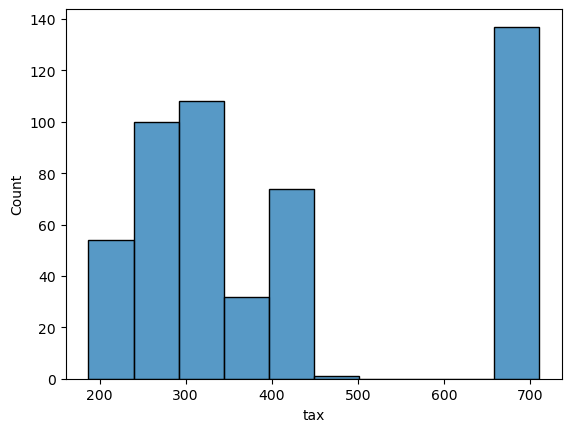

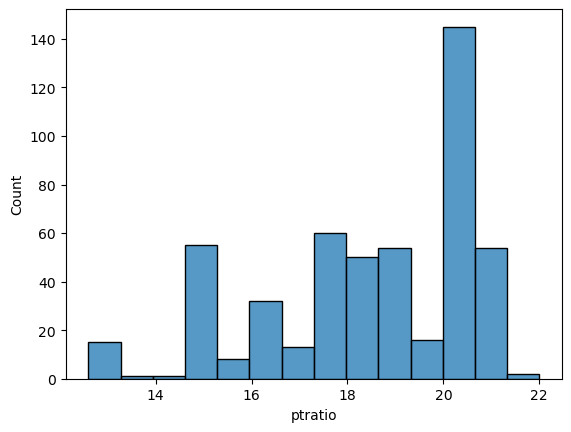

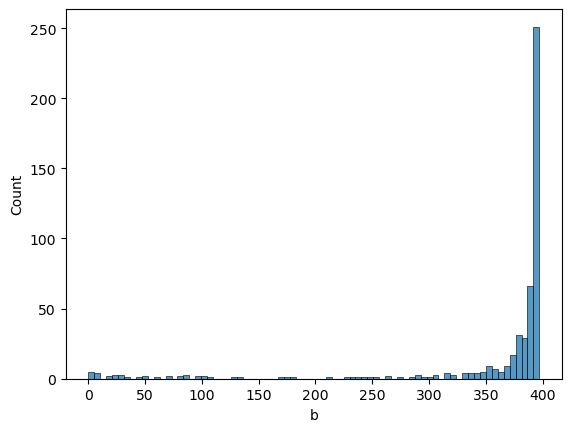

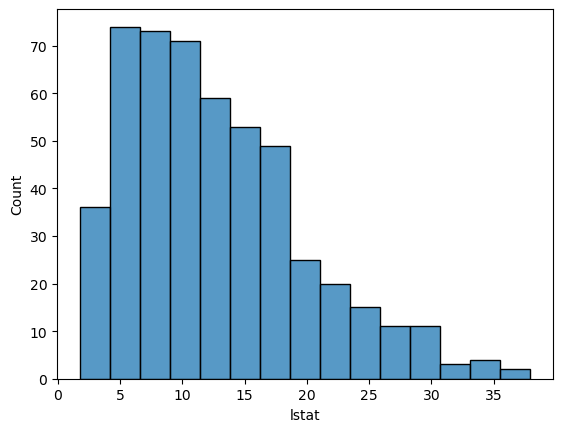

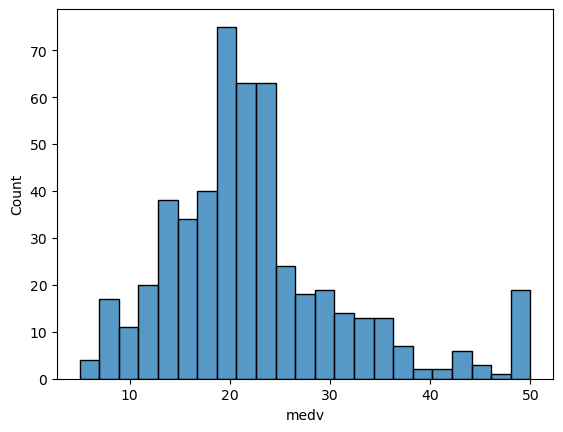

In [69]:
# check distribution pattern of each column. 
for i in range(boston.shape[1]):
    plt.figure()
    sns.histplot(boston.iloc[:,i])
    plt.show()
    plt.close()

lstat, rm and medv can be dealt with by standardisation. These three are normally distributed. The rest of the data does not follow a normal distribution and would have to be normalised. 

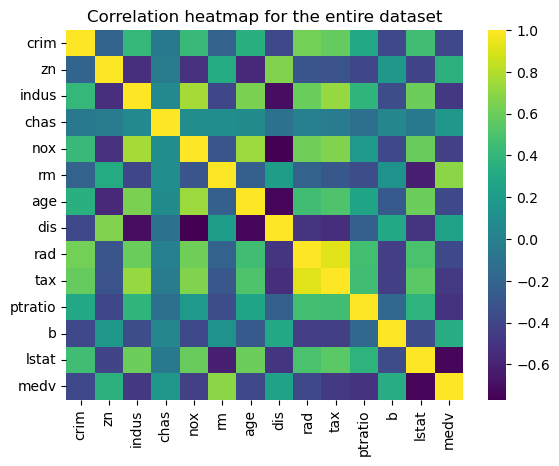

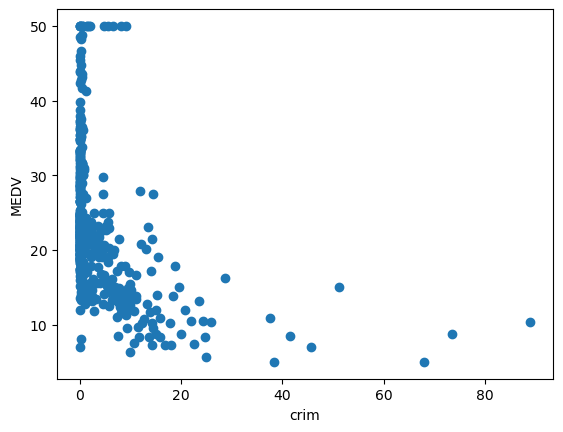

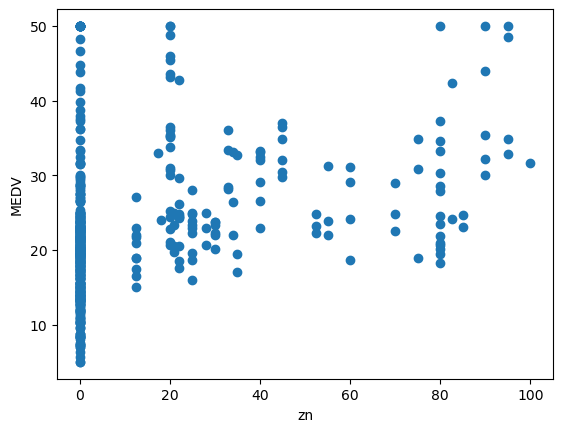

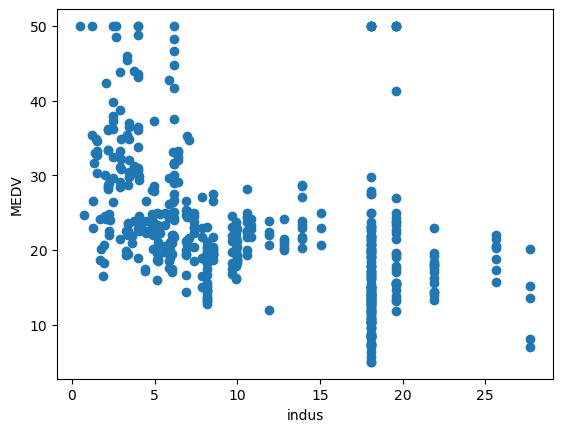

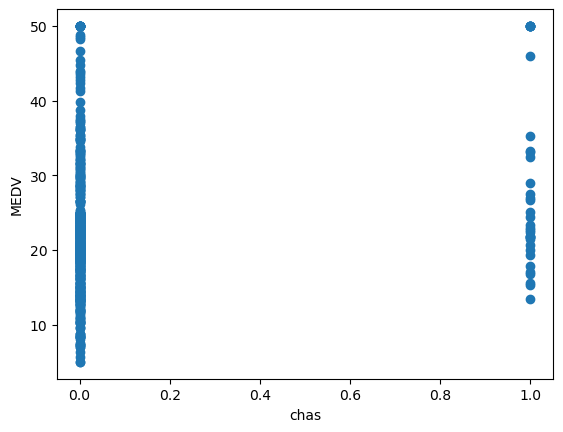

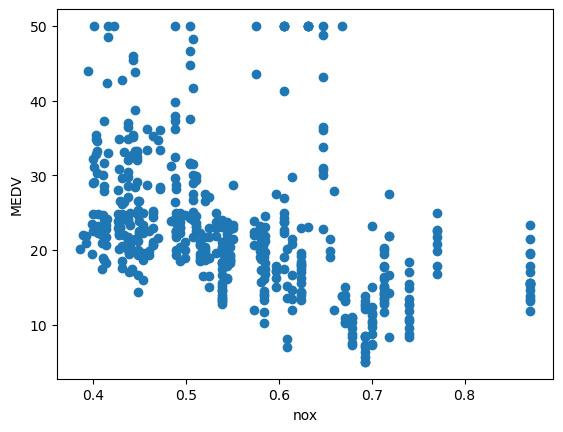

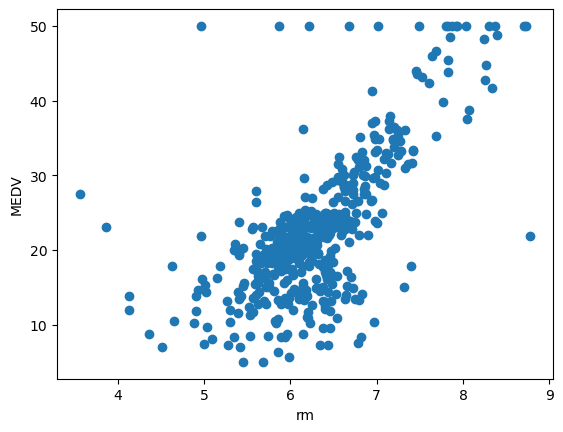

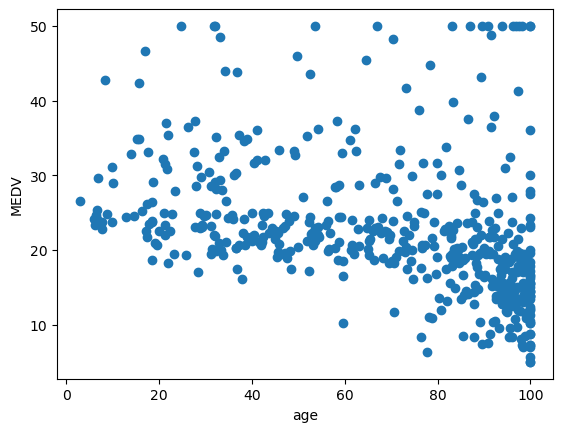

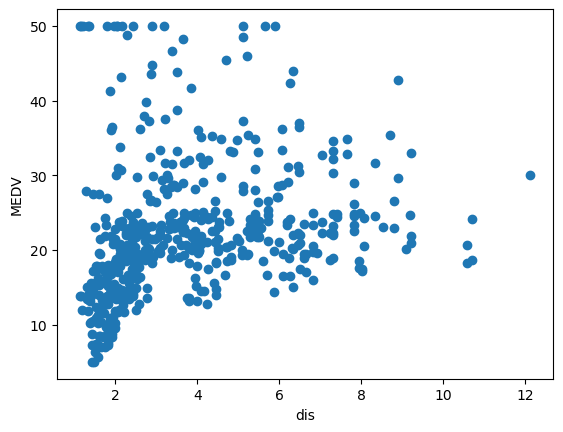

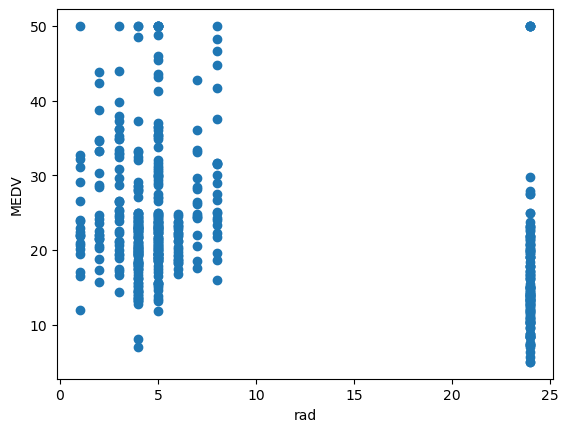

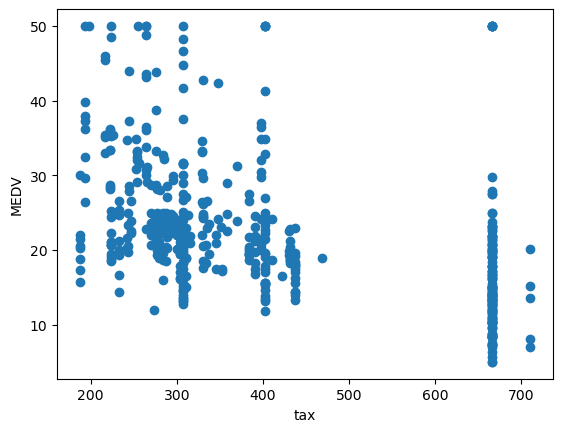

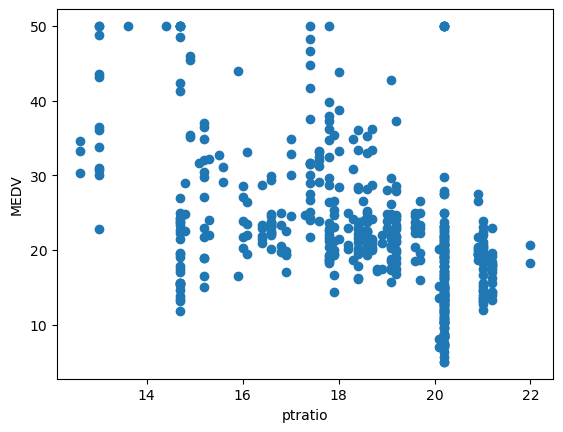

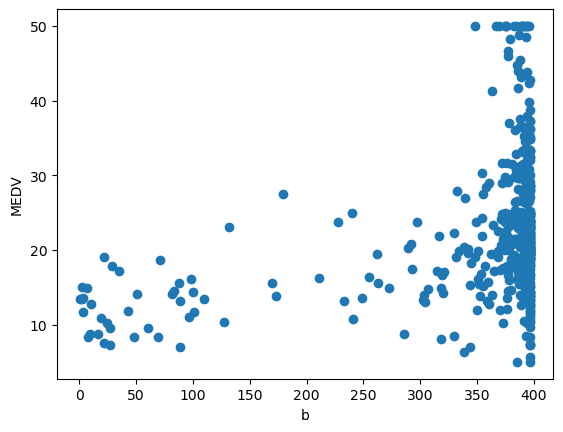

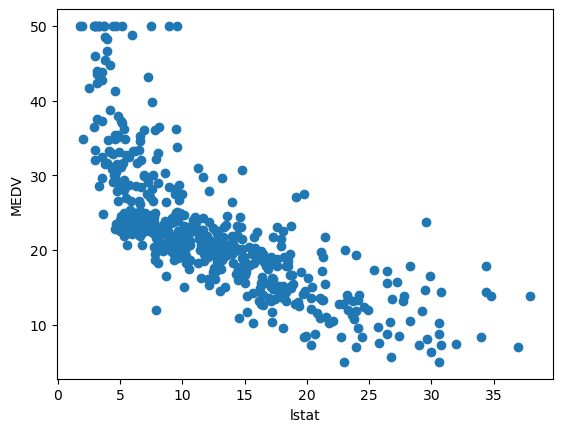

In [99]:
# Explore the data with visualisations such as histograms and correlation matrices
# correlation heatmap (because 11x11 pairplots take way too long to load and appear super tiny)
plt.figure()
correlation_matrix = boston[boston.columns].corr()
# there's both positive and negative correlations in the matrix so I chose a palette with noticeable colors at the extremes; 
# yellow or black = high degree of positive or negative correlation respectively.
sns.heatmap(correlation_matrix, cmap = sns.mpl_palette("viridis", as_cmap=True))
plt.title('Correlation heatmap for the entire dataset')
plt.show()
plt.close()

# relationship between each column and median house value.
for i in range(boston.shape[1]-1):
    plt.figure()
    plt.scatter(boston.iloc[:,i], boston['medv'])
    plt.xlabel(boston.columns[i])
    plt.ylabel('MEDV')
    plt.show()

In [70]:
# Split the independent variables from the dependent variable
X = boston[['rm', 'lstat']].values
X = X.reshape(-1,X.shape[1])
y = boston['medv'].values
y = y.reshape(-1,1)

/Users/vanshikagulati/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


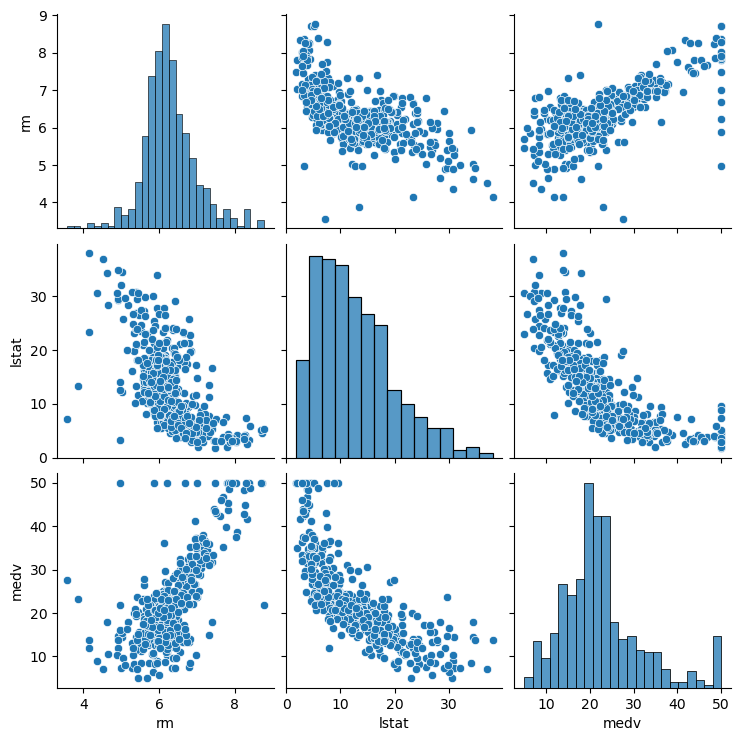

In [71]:
# Explore relationships between the independent and dependent variables
sns.pairplot(boston[['rm', 'lstat', 'medv']])


medv is directly proportional to rm. lstat is inversely proportional to rm and medv.

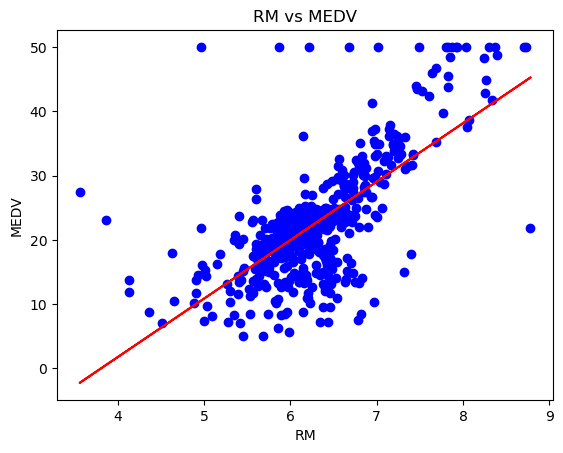

In [94]:
# RM vs MEDV
# get data
x = boston['rm'].values
x = x.reshape(-1,1)
y = boston['medv'].values
y=y.reshape(-1,1)

# create linear regression
rm_model = LinearRegression()
rm_model.fit(x,y)

# plot
plt.scatter(x,y,color = 'b')
plt.plot(x,rm_model.predict(x),color = 'r')
plt.title('RM vs MEDV')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

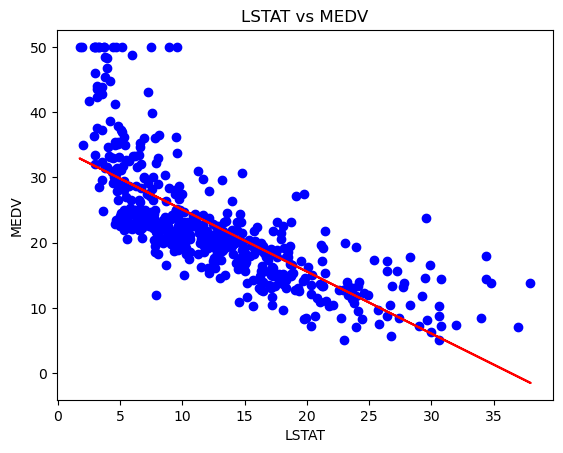

In [95]:
# LSTAT vs MEDV
# get data
x = boston['lstat'].values
x = x.reshape(-1,1)
y = boston['medv'].values
y=y.reshape(-1,1)

# create linear regression
rm_model = LinearRegression()
rm_model.fit(x,y)

# plot
plt.scatter(x,y,color = 'b')
plt.plot(x,rm_model.predict(x),color = 'r')
plt.title('LSTAT vs MEDV')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

In [72]:
# Create a training and test set with a 75:25 split ratio
rseed = 5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=rseed)

In [73]:
# standardise X
scaler = StandardScaler()
scaler.fit(X_train)

# Apply the scaler on train and test data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# create multiple linear regression model
mlr_model = LinearRegression()
# fit model to training data
mlr_model.fit(X_train, y_train)

LinearRegression()

In [74]:
# Create best-fit line
X_line = np.empty(X_test.shape)
for i in range(X_test.shape[1]):
    X_line[:, i] = np.linspace(np.min(X_test[:,i]), np.max(X_test[:,i]), num=X_test.shape[0])
y_line = mlr_model.predict(X_line)

# Print the model intercept and coefficients
print('Intercept: \n', mlr_model.intercept_)
print('Coefficients: \n', mlr_model.coef_)

Intercept: 
 [22.67335092]
Coefficients: 
 [[ 3.41171108 -4.80818346]]


In [75]:
# Generate predictions for the test set
y_pred = mlr_model.predict(X_test)
y_pred[:5]

array([[37.58807857],
       [29.59297169],
       [25.76101249],
       [ 0.74300759],
       [33.53477813]])

In [87]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error = ", mse)
r2 = r2_score(y_test, y_pred)
print("R squared score = ", r2)

Mean Squared Error =  30.592662694483895
R squared score =  0.6293654638684301


The model has r-squared of 0.629 i.e., it explains approx 63% of the vaariance around the mean for the data. It has mean squared error of 30.59 i.e., Root mean squared error of approx 5.5.

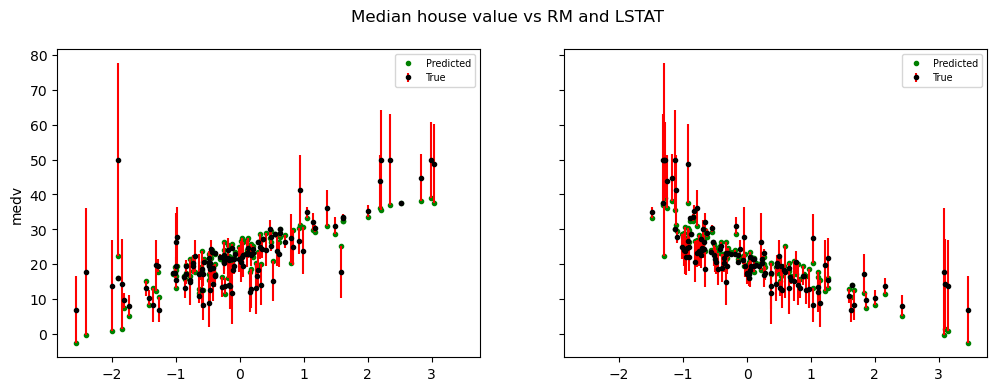

In [106]:
# Generate a plot
fig, ax = plt.subplots(1, X_test.shape[1], sharey=True, sharex=True, figsize = [12,4])
fig.suptitle("Median house value vs RM and LSTAT")
ax[0].set_ylabel(boston.columns[-1])

# Get values for the error bar
error_bar = np.abs((y_test - y_pred)[:,0])

# loops over each independent variable
for i in range(X_test.shape[1]):
    # plot error bars with accurate data.
    ax[i].errorbar(X_test[:, i], y_test[:, 0], yerr=error_bar, fmt='.k', ecolor='red', label='True')
    # plot predicted data
    ax[i].scatter(X_test[:,i], y_pred[:,0], c='g', marker='.', label='Predicted')
    ax[i].legend(loc='best', fontsize='x-small')

In [88]:
# Print the coefficients
mlr_model.coef_

array([[ 3.41171108, -4.80818346]])

**Interpret coefficients in the context of the prediction:**
 The coefficient for number of rooms per dwelling is positive and directly proportional to median house value. More rooms = more expensive place. Low status has a negative coefficient and is therefore inversely proportional to median house value. Higher percentage of low status population = lower median house value.<br><br>
 Additionally, errors are much larger away from the mean, which implies that the relationship between the dependent and independent variables is not strictly linear. This is supported by the simple regression plots. 

**Summarise findings**
* Dataset had no missing values. 
* The crime rate for most records is 0.
* RM, LSTAT, MEDV are normally distributed. 
* Simple regression showed directly proportional linear(ish) relationship between RM and MEDV.
* Simple regression showed inversely proportional linear(ish) relationship between LSTAT and MEDV.
* Multiple linear regression model had a r-squared of ~63% and RMSE of 5.5. 
* Error bars on chart for MLR model shows maximum error 1.5-2 standard deviations away from the mean, suggesting a non-linear relationship between the variables at the edges of the data. 
* From the correlation map: Median house value **decreases** with high crime rate, high industrial area, high air pollution, high pupil-to-teacher ratio and high tax rates. 